# Notebook 1: Business Understanding

This notebook will contain the visualisation and gathering of users data on Spotify.

## 1. Data acquisition

Spotify provides a [Web API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) that lets developers obtain a track's features given its *unique Spotify ID*. This section of the notebook aims at testing the API.

`track_features_fetcher.py` already contains a function `get_track_features` that, given a track ID in Spotify, returns the features associated to the track.

In [6]:
from track_features_fetcher import get_track_features

This function can be used by providing the Spotify URL to the track.

![](docs/get_track_link.png)

To get a taste of how gathering the data would look like, here is the output of the song for an arbitrary track.

In [7]:
get_track_features('https://open.spotify.com/track/0GELyRjqIrjkqA53BL9Tov?si=b25a4995f6be4a58')

{'danceability': 0.461,
 'energy': 0.501,
 'key': 5,
 'loudness': -6.455,
 'mode': 0,
 'speechiness': 0.0678,
 'acousticness': 0.576,
 'instrumentalness': 1.49e-06,
 'liveness': 0.092,
 'valence': 0.561,
 'tempo': 158.095}

A dataset can then be put together and annotated by the user for further analysis.

## 2. Exploratory Data Analysis

The data used for this section was annotated and made ready for download by [GeorgeMcIntire](https://www.kaggle.com/code/jaiswal003/spotify-dataset-eda). 

> A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for songs I don't like. 

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
spotify = pd.read_csv('data.csv')

**Getting innformation about the dataset**

In [10]:
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [11]:
spotify.shape

(2017, 17)

In [12]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [13]:
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


**We will check if our data contains any missing values or not.**

In [14]:
spotify.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

**We didn't find any Null information.
Now we will check if there is any duplicates**

In [15]:
spotify.drop_duplicates(inplace=True)
spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [16]:
spotify.value_counts("target")

target
1    1020
0     997
dtype: int64

1 means I liked the song
0 means I didn't

### Data Visualization

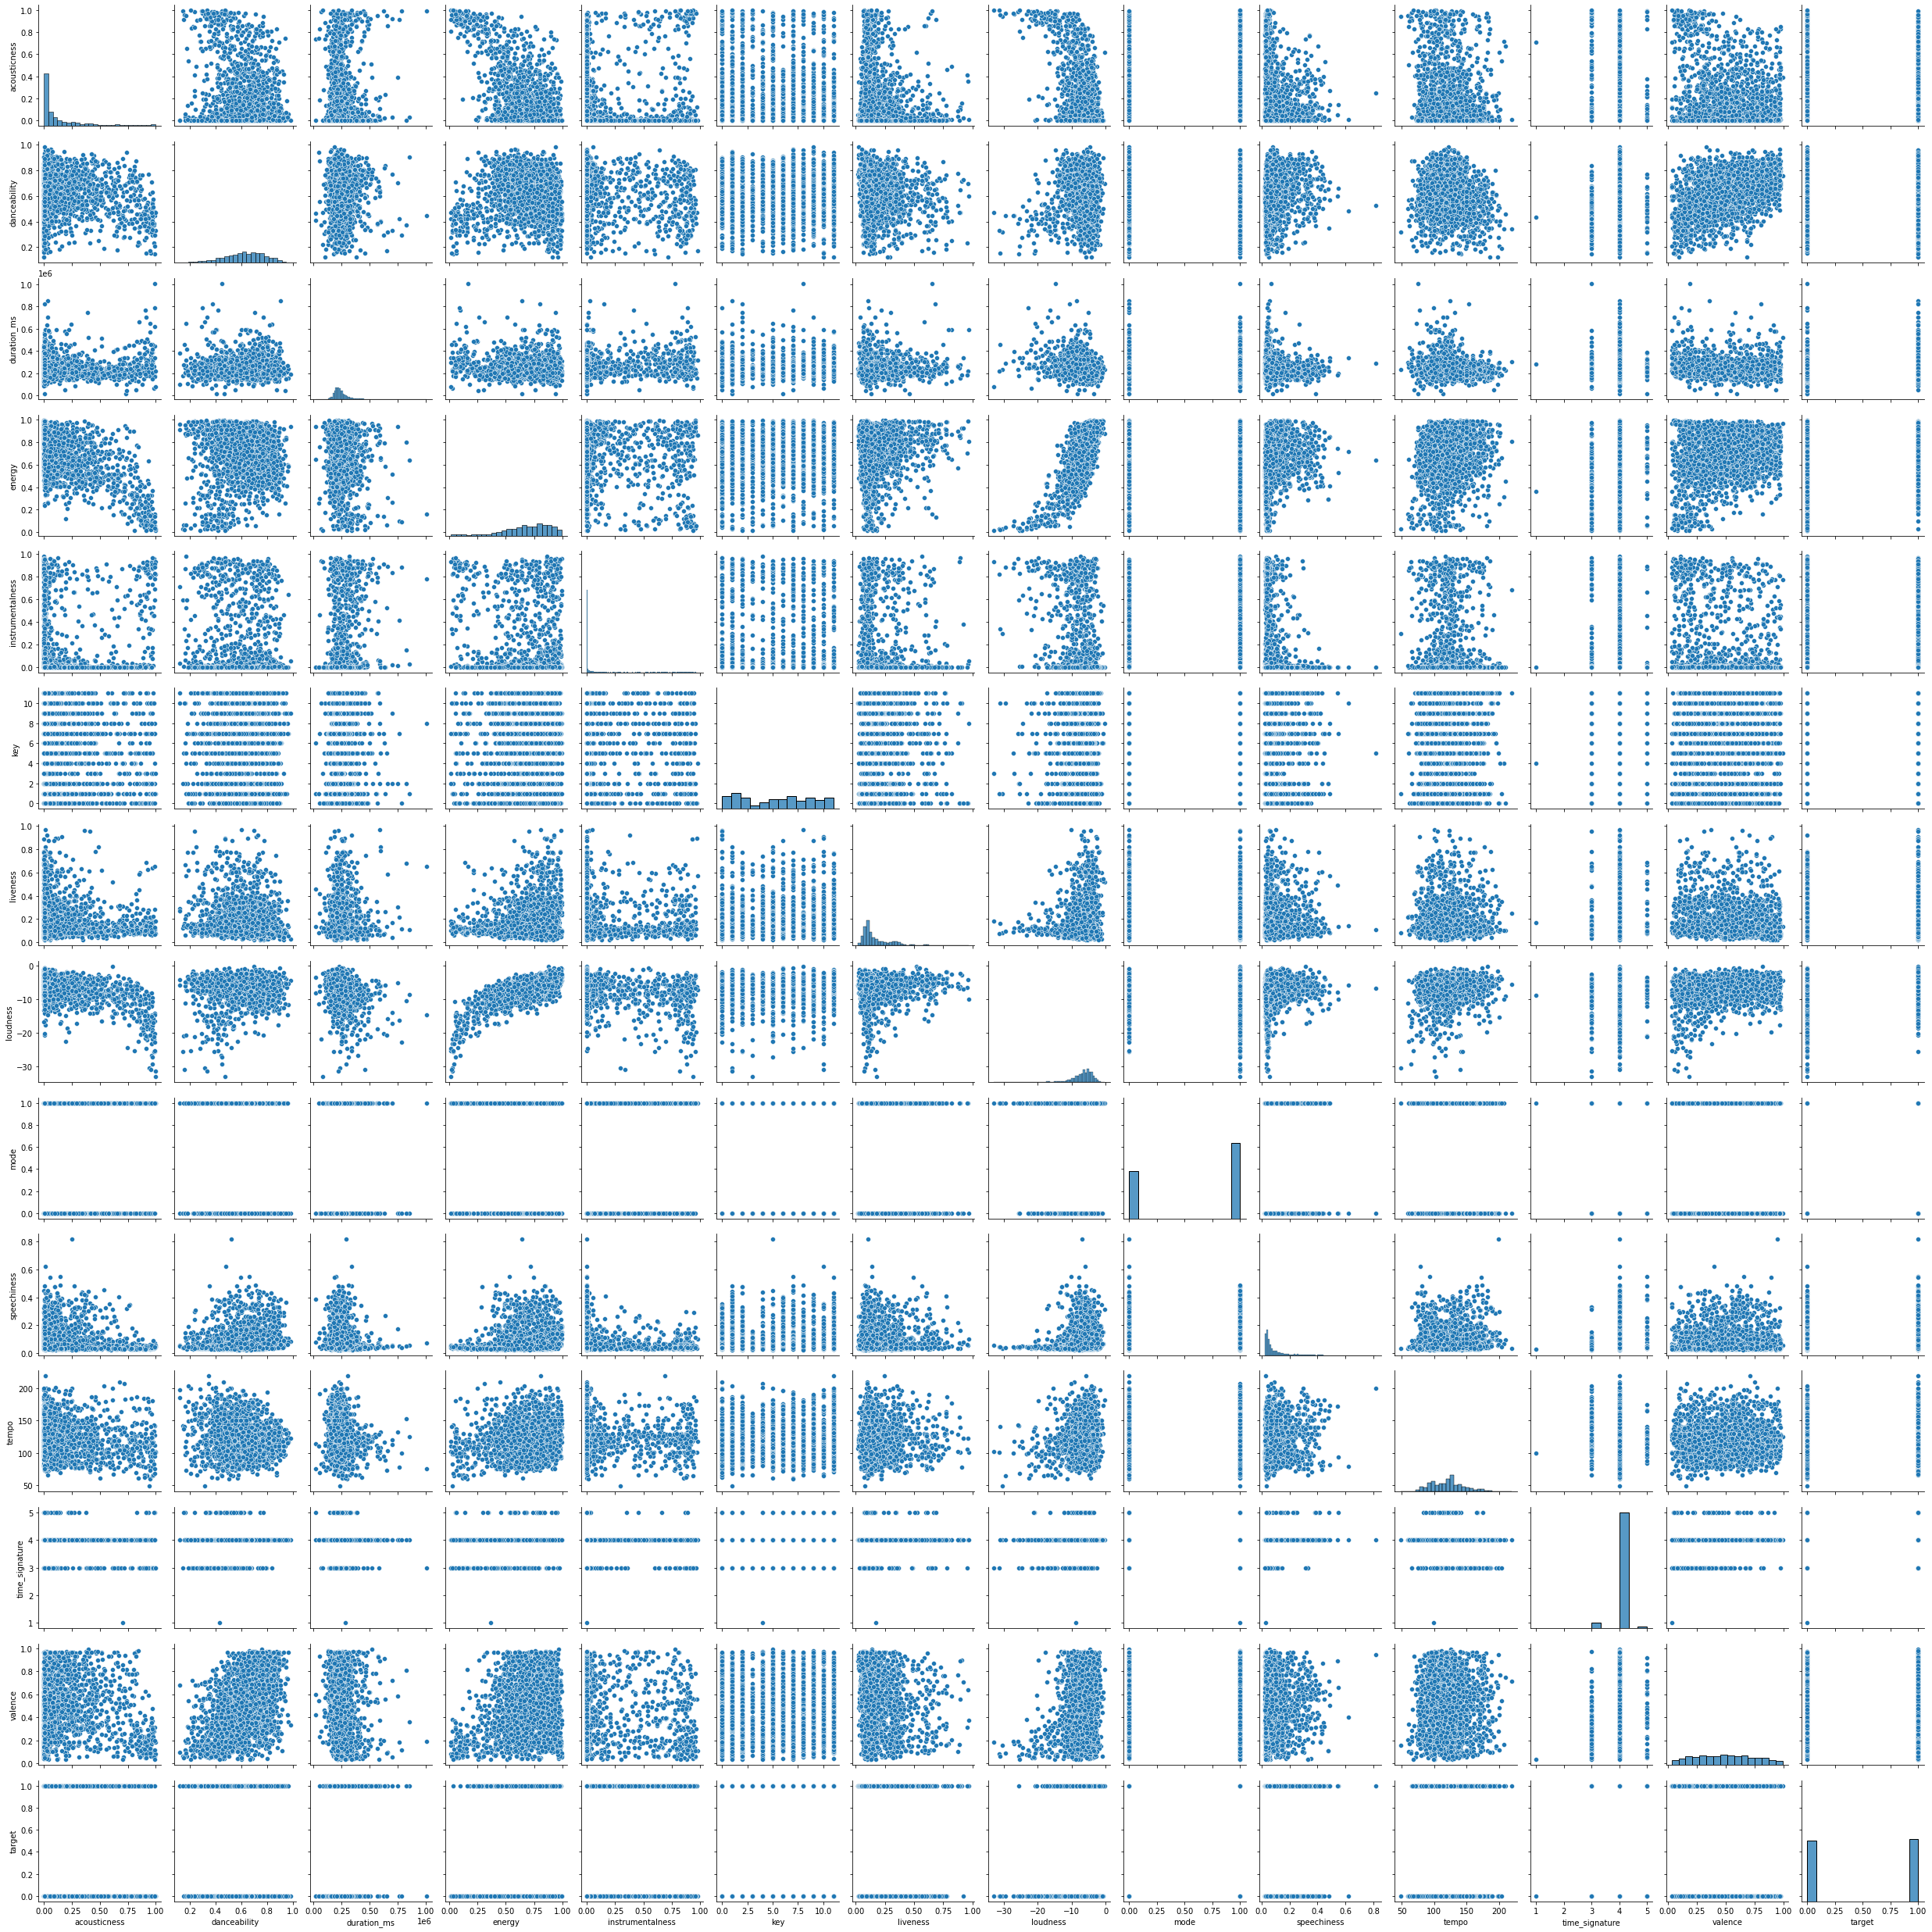

In [17]:
d_spotify=spotify.drop(columns=['Unnamed: 0','song_title','artist'],inplace=False)
sns.pairplot(d_spotify)

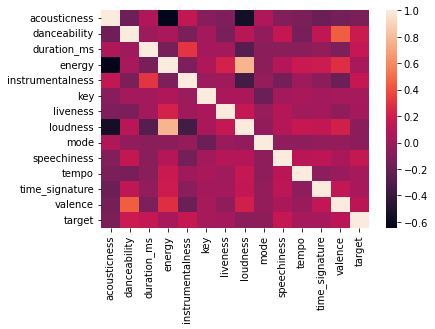

In [18]:
sns.heatmap(d_spotify.corr(method='pearson')) #pearson : standard correlation coefficient
plt.show()

We can see that the energy and loudness have high correlation.
We will drop one of them, we choose to drop energy.

In [19]:
d_spotify.drop(columns='energy',inplace=True)
d_spotify

,acousticness,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


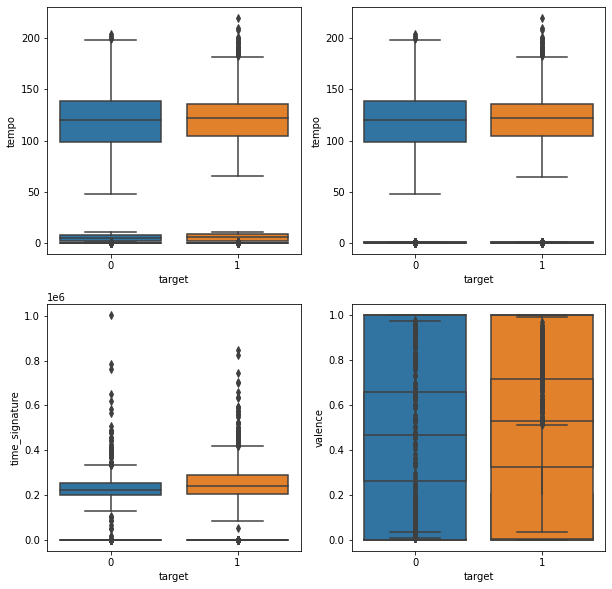

In [20]:
def graph(y):
    sns.boxplot(x="target", y=y, data=d_spotify)
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('acousticness')
  
plt.subplot(222)
graph('danceability')
  
plt.subplot(223)
graph('duration_ms')
  
plt.subplot(224)
graph('instrumentalness')
plt.subplot(221)
graph('key')
  
plt.subplot(222)
graph('liveness')
  
plt.subplot(223)
graph('loudness')
  
plt.subplot(224)
graph('mode')

plt.subplot(221)
graph('speechiness')
  
plt.subplot(222)
graph('tempo')
  
plt.subplot(223)
graph('time_signature')

plt.subplot(224)
graph('valence')
  
plt.subplot(221)
graph('tempo')
  
plt.show()
